# Examen del 2do Parcial

Sofia Macarena Castillo Badilla

1. Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

2. Utilizando el dataset de _Coactivation_matrix.mat_:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.signal import coherence, hilbert
import scipy.io

## Sección 1: Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

In [3]:
# 1
datos_ruta = r"/Users/Maca/Desktop/Todo todo/UNAM/5º Semestre/Neurociencias-2026-1/S03_datasets/BCT/Coactivation_matrix.mat"

datos = scipy.io.loadmat(datos_ruta)
data = datos["Coactivation_matrix"]
df = pd.DataFrame(data)
df = df.fillna(0)
G = nx.from_numpy_array(data)


In [10]:
# COEFICIENTE DE MUNDO PEQUEÑO
C = nx.average_clustering(G)
L = nx.average_shortest_path_length(G)
C, L
print("Coeficiente de cluster:", C)
print("Ruta más corta:", L)

# grafo aleatorio, para poder comparar
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

G_random = nx.gnm_random_graph(n_nodes, n_edges)

clustering_coefficient_random = nx.average_clustering(G_random)
print("Coeficiente de cluster (Random):", clustering_coefficient_random)

if nx.is_connected(G_random):
    avg_shortest_path_length_random = nx.average_shortest_path_length(G_random)
    print("Ruta más corta (Random):", avg_shortest_path_length_random)

#COEFICIENTE FINAL
if avg_shortest_path_length_random > 0 and L > 0:
    small_world_coefficient = (C / clustering_coefficient_random) / (L / avg_shortest_path_length_random)
    print("Coeficiente de mundo pequeño:", small_world_coefficient)

Coeficiente de cluster: 0.3844533292242753
Ruta más corta: 2.2148737961545844
Coeficiente de cluster (Random): 0.09204385775534468
Ruta más corta (Random): 1.9126194003041295
Coeficiente de mundo pequeño: 3.6068525213346727


In [4]:
# COMUNIDADES
from networkx.algorithms import community

comunidades = list(community.greedy_modularity_communities(G))
print(f"Número de comunidades: {len(comunidades)}")

for i, c in enumerate(comunidades):
    print(f"Comunidad {i+1} ({len(c)} nodos): {sorted(list(c))[:10]}")

Número de comunidades: 3
Comunidad 1 (334 nodos): [0, 1, 2, 3, 4, 8, 9, 11, 13, 14]
Comunidad 2 (201 nodos): [5, 6, 7, 10, 12, 15, 16, 18, 20, 37]
Comunidad 3 (103 nodos): [26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [4]:
# HUBS
degrees = dict(G.degree())
avg_degree = np.mean(list(degrees.values()))
hubs = [node for node, degree in degrees.items() if degree > avg_degree]
print("Potential Hubs (degree > average):", hubs)

Potential Hubs (degree > average): [6, 7, 11, 16, 18, 19, 20, 22, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 50, 62, 63, 65, 68, 69, 70, 73, 76, 79, 80, 87, 93, 95, 97, 98, 100, 103, 104, 116, 118, 120, 121, 124, 125, 126, 128, 129, 130, 131, 135, 154, 158, 160, 167, 184, 186, 193, 194, 197, 202, 208, 211, 217, 219, 220, 223, 228, 230, 231, 232, 233, 235, 237, 238, 240, 244, 248, 252, 253, 259, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 288, 289, 291, 292, 296, 298, 303, 305, 308, 309, 327, 328, 329, 330, 331, 332, 333, 334, 335, 339, 344, 345, 346, 347, 348, 350, 351, 352, 353, 354, 356, 357, 358, 359, 360, 361, 362, 364, 365, 367, 368, 369, 370, 371, 373, 374, 375, 377, 383, 385, 387, 391, 393, 394, 396, 397, 398, 399, 400, 401, 403, 404, 405, 406, 407, 408, 410, 411, 412, 414, 416, 418, 419, 420, 421, 427, 428, 431, 434, 436, 447, 450, 452, 453, 455, 457, 458, 462, 463, 465, 472, 473, 474, 475, 476, 477, 478, 479, 480, 

In [6]:
# EFICIENCIA GLOBAL Y LOCAL
def global_efficiency(G):
    n = len(G)
    if n <= 1:
        return 0
    lengths = dict(nx.all_pairs_shortest_path_length(G))
    s = 0
    for u in lengths:
        for v, d in lengths[u].items():
            if u != v:
                s += 1 / d
    return s / (n * (n - 1))

def local_efficiency(G):
    effs = []
    for v in G:
        vecinos = list(G.neighbors(v))
        if len(vecinos) >= 2:
            sub = G.subgraph(vecinos)
            effs.append(global_efficiency(sub))
    return np.mean(effs)

E_global = global_efficiency(G)
E_local = local_efficiency(G)

print(f"Eficiencia global: {E_global:.3f}")
print(f"Eficiencia local:  {E_local:.3f}")

Eficiencia global: 0.495
Eficiencia local:  0.664


In [7]:
# GRADO POR NODO
degree_dict = dict(G.degree())
degree_dict

{0: 32,
 1: 26,
 2: 38,
 3: 37,
 4: 29,
 5: 58,
 6: 88,
 7: 124,
 8: 29,
 9: 57,
 10: 54,
 11: 59,
 12: 44,
 13: 49,
 14: 50,
 15: 36,
 16: 124,
 17: 49,
 18: 86,
 19: 109,
 20: 73,
 21: 37,
 22: 62,
 23: 47,
 24: 31,
 25: 54,
 26: 20,
 27: 35,
 28: 27,
 29: 40,
 30: 30,
 31: 42,
 32: 31,
 33: 37,
 34: 29,
 35: 56,
 36: 49,
 37: 108,
 38: 149,
 39: 73,
 40: 78,
 41: 114,
 42: 120,
 43: 123,
 44: 126,
 45: 76,
 46: 90,
 47: 43,
 48: 51,
 49: 34,
 50: 85,
 51: 54,
 52: 25,
 53: 31,
 54: 47,
 55: 25,
 56: 25,
 57: 57,
 58: 15,
 59: 32,
 60: 43,
 61: 21,
 62: 96,
 63: 66,
 64: 56,
 65: 91,
 66: 42,
 67: 41,
 68: 75,
 69: 92,
 70: 115,
 71: 41,
 72: 37,
 73: 102,
 74: 34,
 75: 58,
 76: 80,
 77: 26,
 78: 45,
 79: 60,
 80: 67,
 81: 53,
 82: 26,
 83: 43,
 84: 47,
 85: 16,
 86: 54,
 87: 79,
 88: 54,
 89: 51,
 90: 42,
 91: 39,
 92: 34,
 93: 81,
 94: 55,
 95: 60,
 96: 48,
 97: 119,
 98: 82,
 99: 56,
 100: 120,
 101: 19,
 102: 23,
 103: 63,
 104: 89,
 105: 56,
 106: 23,
 107: 48,
 108: 24,
 109: 2

## Sección 2
- Generar el mapa de calor de __cada__ matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

In [12]:
sfreq_target = 256       
fmin, fmax = 8, 13 

# 1. MATRIZ DE CORRELACIÓN DE PEARSON
corr_matrix = np.corrcoef(data)
corr_df = pd.DataFrame(corr_matrix)

# 2. MATRIZ DE COHERENCIA ESPECTRAL 
n_channels=638
coh_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        f, Cxy = coherence(data[i], data[j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coh_matrix[i, j] = np.mean(Cxy[mask])

coh_df = pd.DataFrame(coh_matrix)

# 3. MATRIZ DE PHASE LOCKING VALUE (PLV) 
analytic_signal = hilbert(data)
phase_data = np.angle(analytic_signal)

plv_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        phase_diff = phase_data[i] - phase_data[j]
        plv_matrix[i, j] = np.abs(np.sum(np.exp(1j * phase_diff)) / phase_diff.size)

plv_df = pd.DataFrame(plv_matrix)


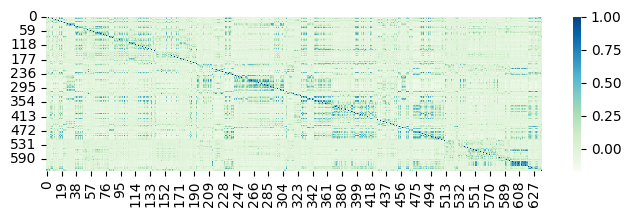

Percentil 25: -0.0547
Percentil 50: -0.0321
Percentil 75: 0.0209
Created graph 'pearson_25' with 638 nodes and 203203 edges.
Created graph 'pearson_50' with 638 nodes and 203203 edges.
Created graph 'pearson_75' with 638 nodes and 173479 edges.


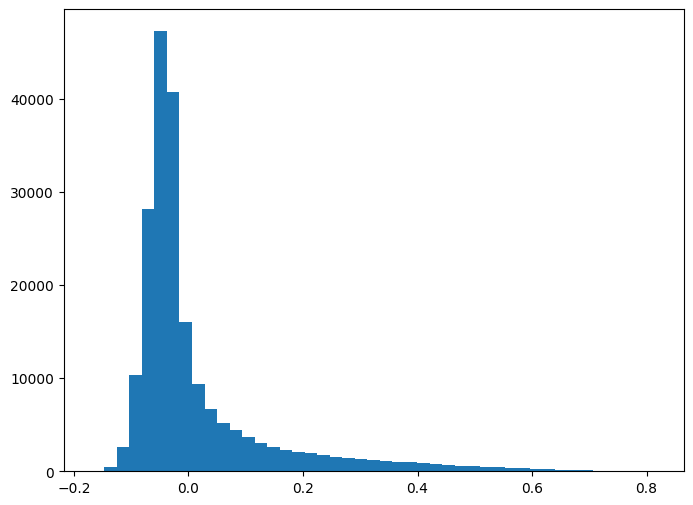

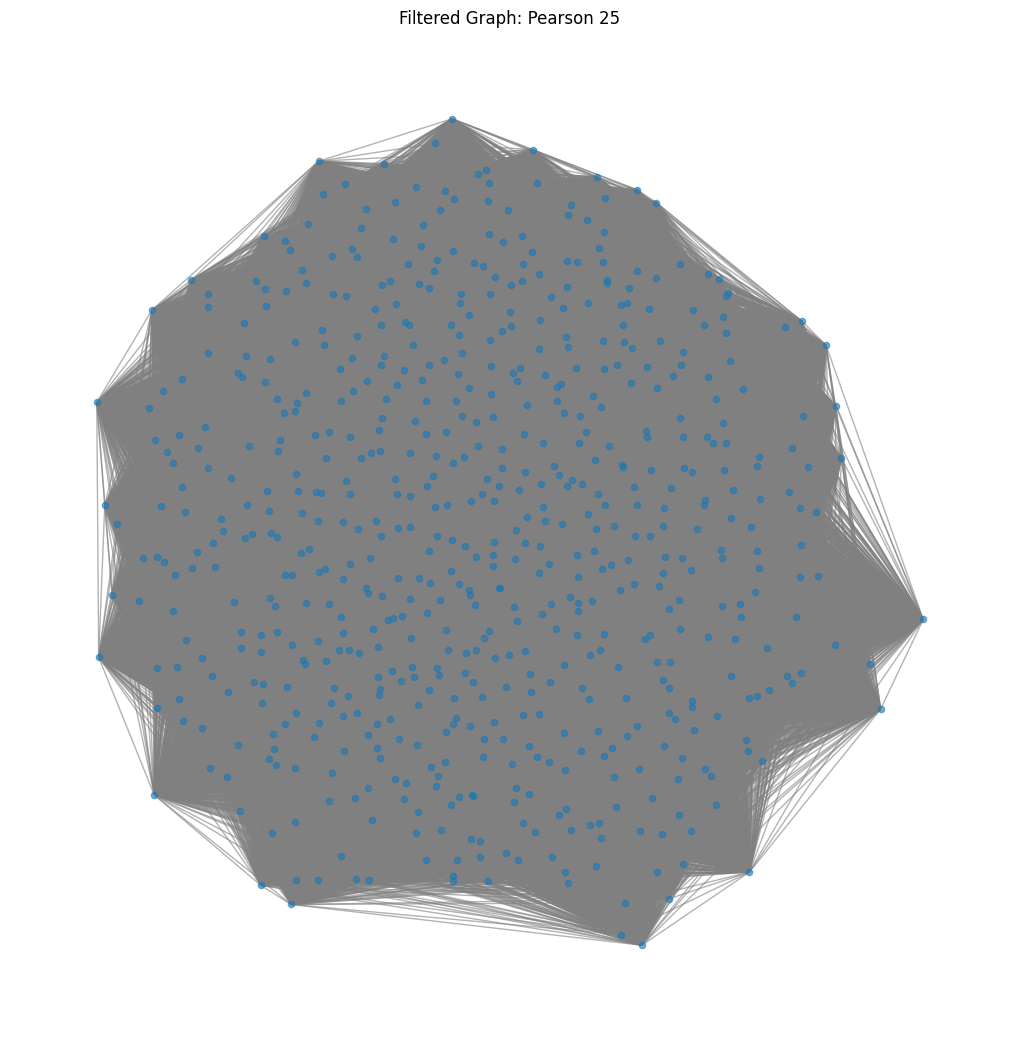

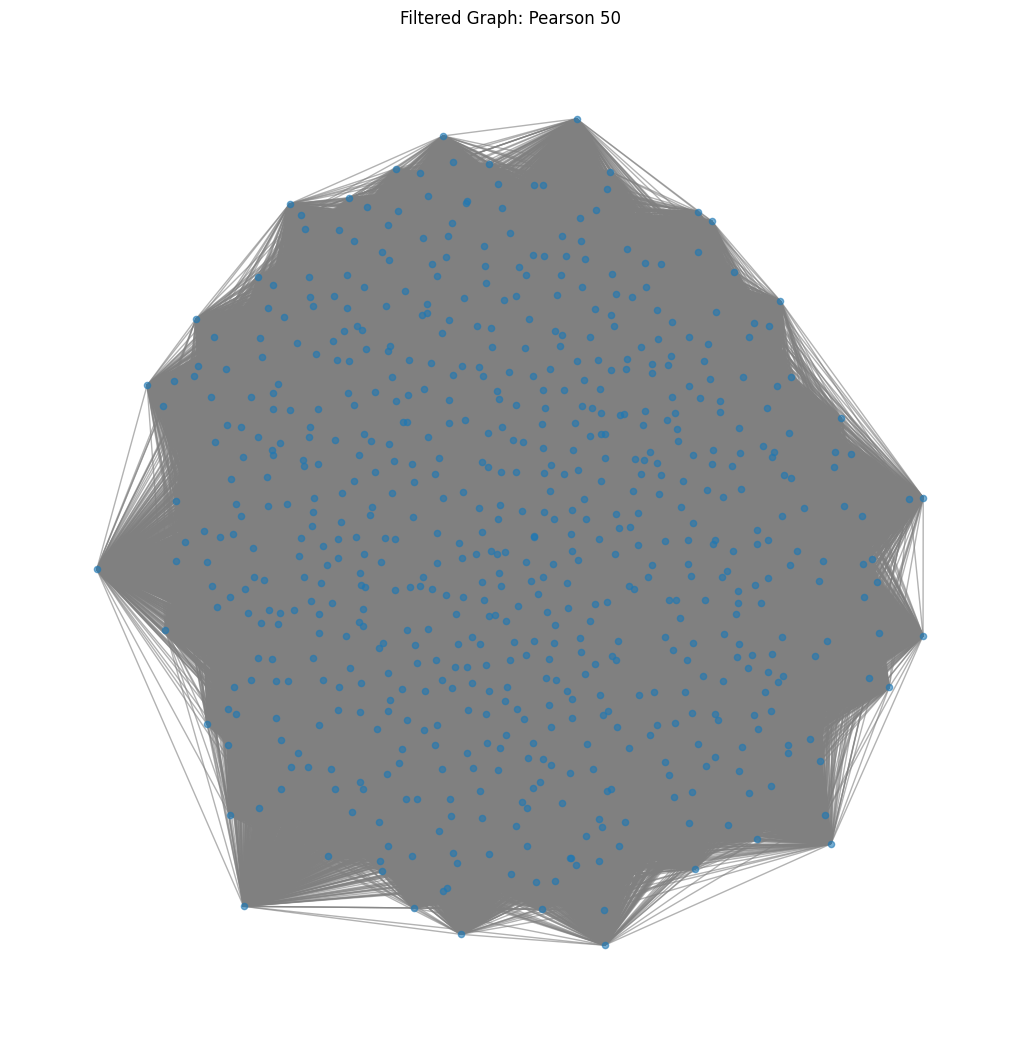

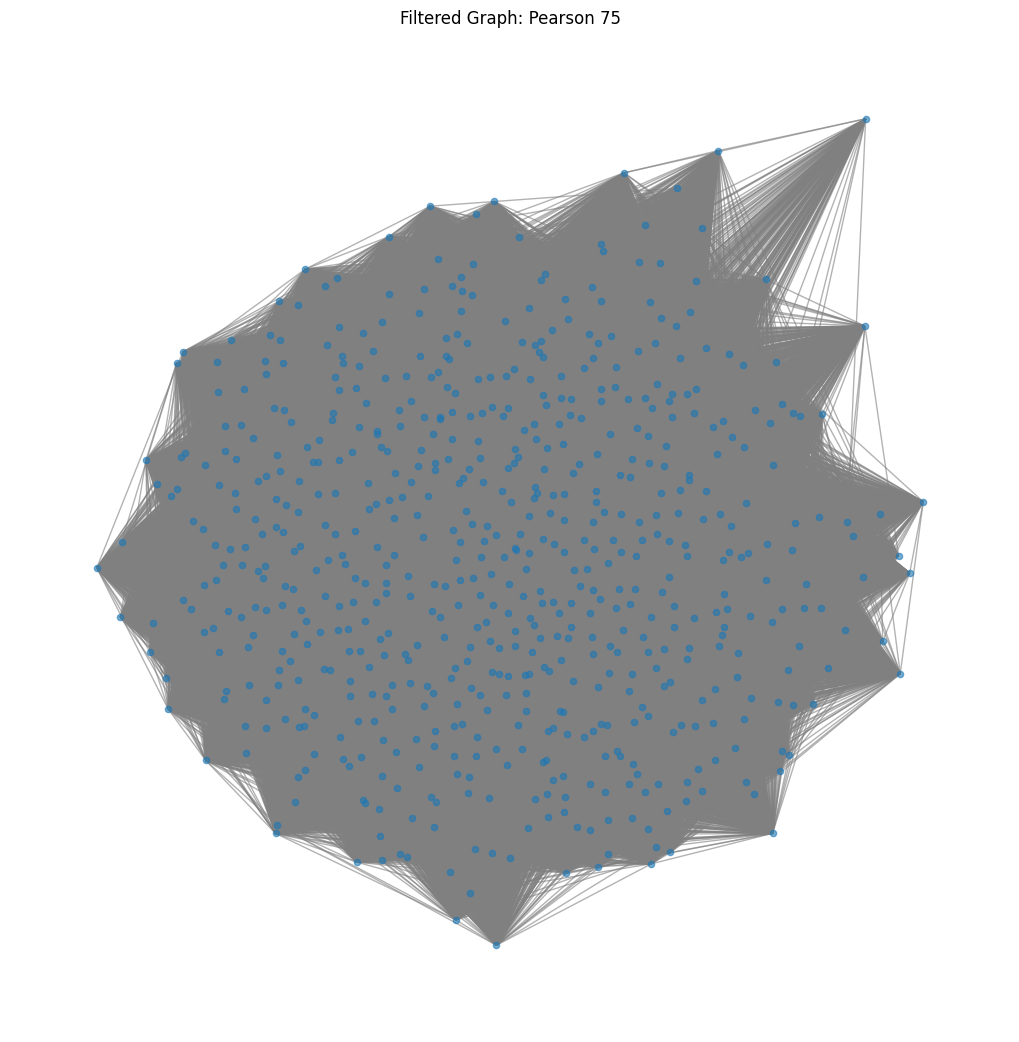

In [29]:
# CORRELACIÓN DE PEARSON
plt.figure(figsize=(8, 2))
co= sns.heatmap(corr_df.values,
                 annot=False, cmap='GnBu', fmt=".2f")
plt.show()

# Distribución
plt.figure(figsize=(8, 6))
val_corr = corr_df.values[np.triu_indices_from(corr_df, k=1)]
plt.hist(val_corr, bins=45)

#percentiles
p25 = np.percentile(val_corr, 25)  
p50 = np.percentile(val_corr, 50)  
p75 = np.percentile(val_corr, 75)  

print(f"Percentil 25: {p25:.4f}")
print(f"Percentil 50: {p50:.4f}")
print(f"Percentil 75: {p75:.4f}")

#Gráficas
percentiles = {'25': p25, '50': p50, '75': p75}
filtrado_p = {}

for name, threshold in percentiles.items():
    G_filt_p = nx.Graph()
    num_nodes = corr_df.shape[0]
    G_filt_p.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            weight = corr_df.iloc[i, j]
            if abs(weight) > threshold: 
                G_filt_p.add_edge(i, j, weight=weight)

    graph_key = f"pearson_{name.replace(' ', '_').lower()}"
    filtrado_p[graph_key] = G_filt_p

    print(f"Created graph '{graph_key}' with {G_filt_p.number_of_nodes()} nodes and {G_filt_p.number_of_edges()} edges.")

for graph_key, G_to_draw in filtrado_p.items():
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G_to_draw) 
    nx.draw(G_to_draw, pos, with_labels=False, node_size=20, edge_color='gray', alpha=0.6)
    plt.title(f'Filtered Graph: {graph_key.replace("_", " ").title()}')
    plt.show()

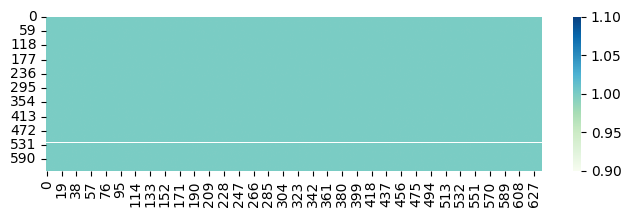

Percentil 25: -0.0547
Percentil 50: -0.0321
Percentil 75: 0.0209
Created graph 'coherencia espectral_25' with 638 nodes and 202566 edges.
Created graph 'coherencia espectral_50' with 638 nodes and 202566 edges.
Created graph 'coherencia espectral_75' with 638 nodes and 202566 edges.


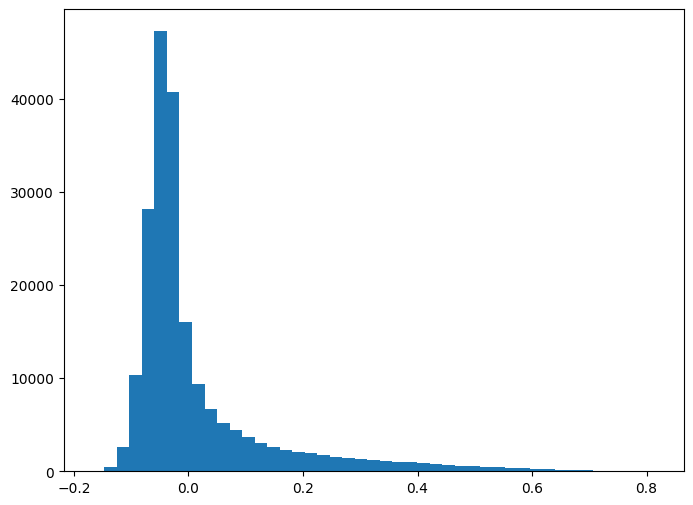

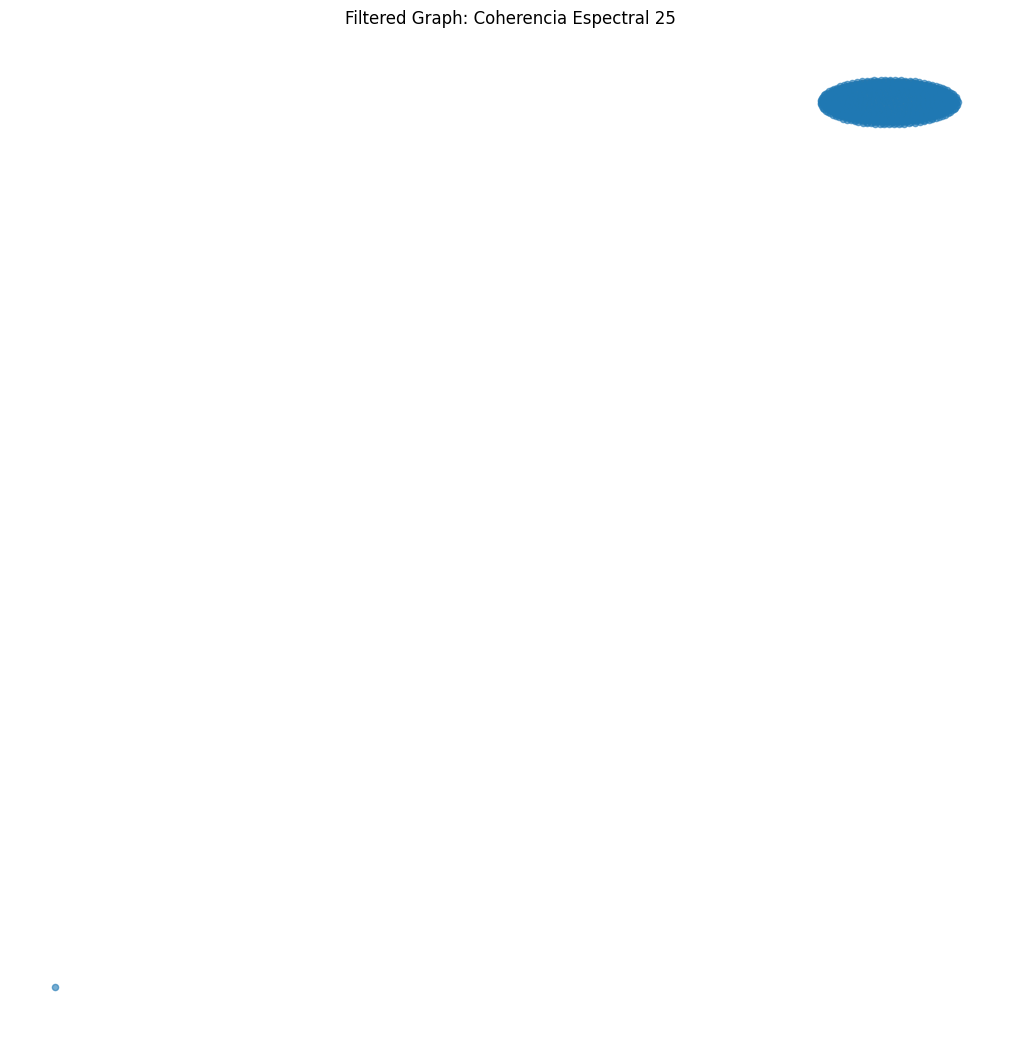

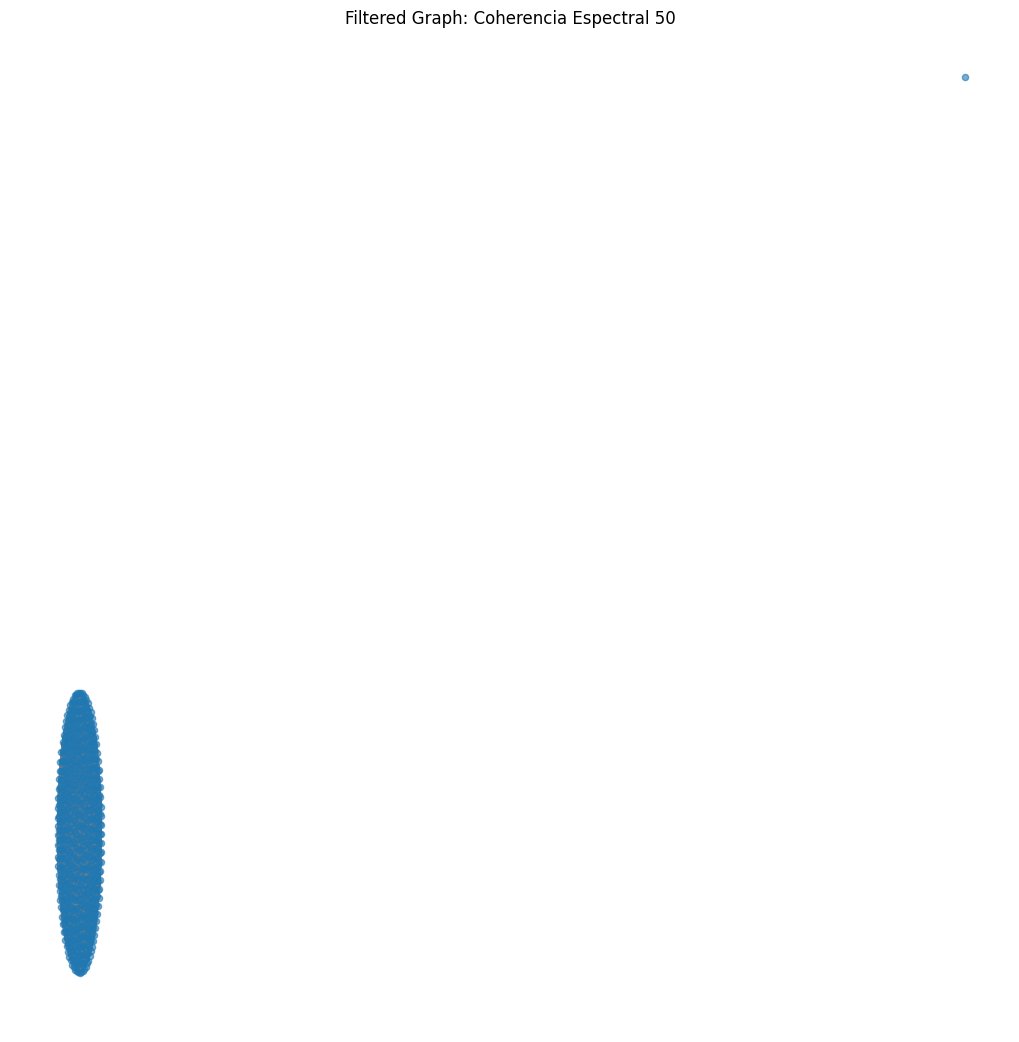

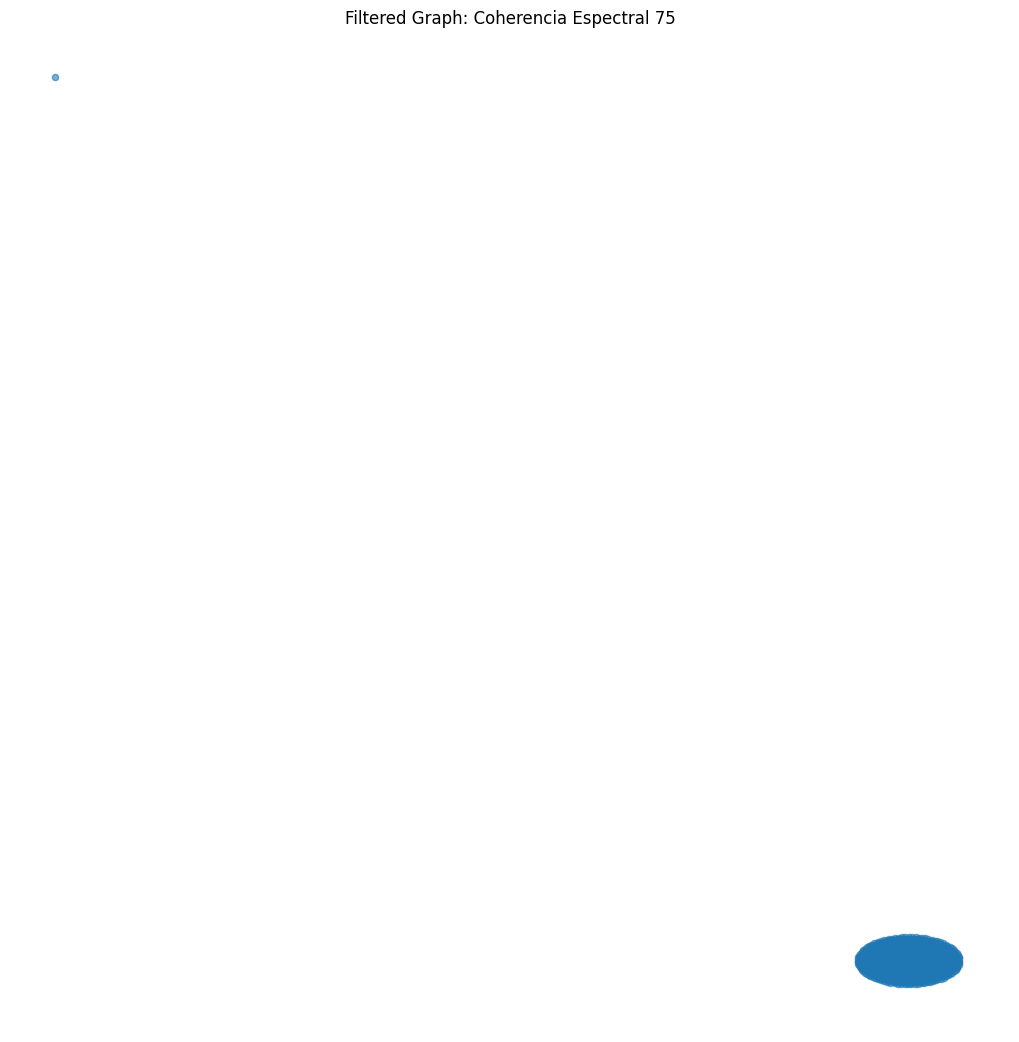

In [30]:
# COHERENCIA ESPECTRAL
plt.figure(figsize=(8, 2))
coh = sns.heatmap(coh_df.values,
                 annot=False, cmap='GnBu', fmt=".2f")
plt.show()

# Distribución
plt.figure(figsize=(8, 6))
val_coh = corr_df.values[np.triu_indices_from(coh_df, k=1)]
plt.hist(val_coh, bins=45)

#percentiles
p25_c = np.percentile(val_coh, 25)  
p50_c = np.percentile(val_coh, 50)  
p75_c = np.percentile(val_coh, 75)  

print(f"Percentil 25: {p25_c:.4f}")
print(f"Percentil 50: {p50_c:.4f}")
print(f"Percentil 75: {p75_c:.4f}")

# gráficas
percentiles_c = {'25': p25_c, '50': p50_c, '75': p75_c}
filtrado_c = {}

for name, threshold in percentiles_c.items():
    G_filt_c = nx.Graph()
    num_nodes_c = coh_df.shape[0]
    G_filt_c.add_nodes_from(range(num_nodes_c))

    for i in range(num_nodes_c):
        for j in range(i + 1, num_nodes_c):
            weight_c = coh_df.iloc[i, j]
            if abs(weight_c) > threshold: 
                G_filt_c.add_edge(i, j, weight_c=weight_c)

    graph_key_c = f"coherencia espectral_{name.replace(' ', '_').lower()}"
    filtrado_c[graph_key_c] = G_filt_c

    print(f"Created graph '{graph_key_c}' with {G_filt_c.number_of_nodes()} nodes and {G_filt_c.number_of_edges()} edges.")

for graph_key, G_to_draw in filtrado_c.items():
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G_to_draw) 
    nx.draw(G_to_draw, pos, with_labels=False, node_size=20, edge_color='gray', alpha=0.6)
    plt.title(f'Filtered Graph: {graph_key.replace("_", " ").title()}')
    plt.show()

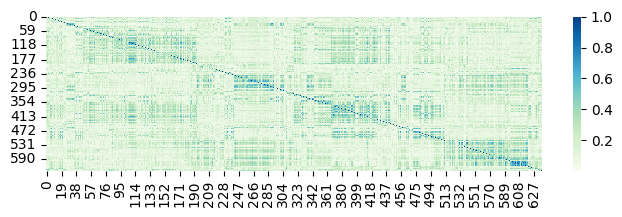

Percentil 25: -0.0547
Percentil 50: -0.0321
Percentil 75: 0.0209
Created graph 'phase locking value_25' with 638 nodes and 0 edges.
Created graph 'phase locking value_50' with 638 nodes and 0 edges.
Created graph 'phase locking value_75' with 638 nodes and 0 edges.


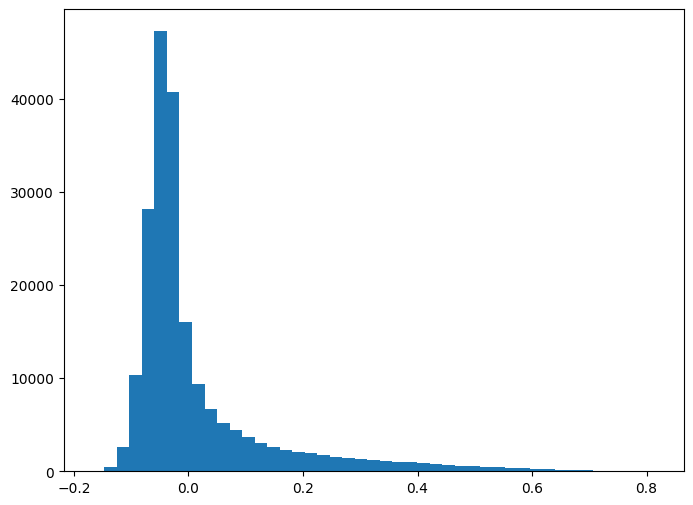

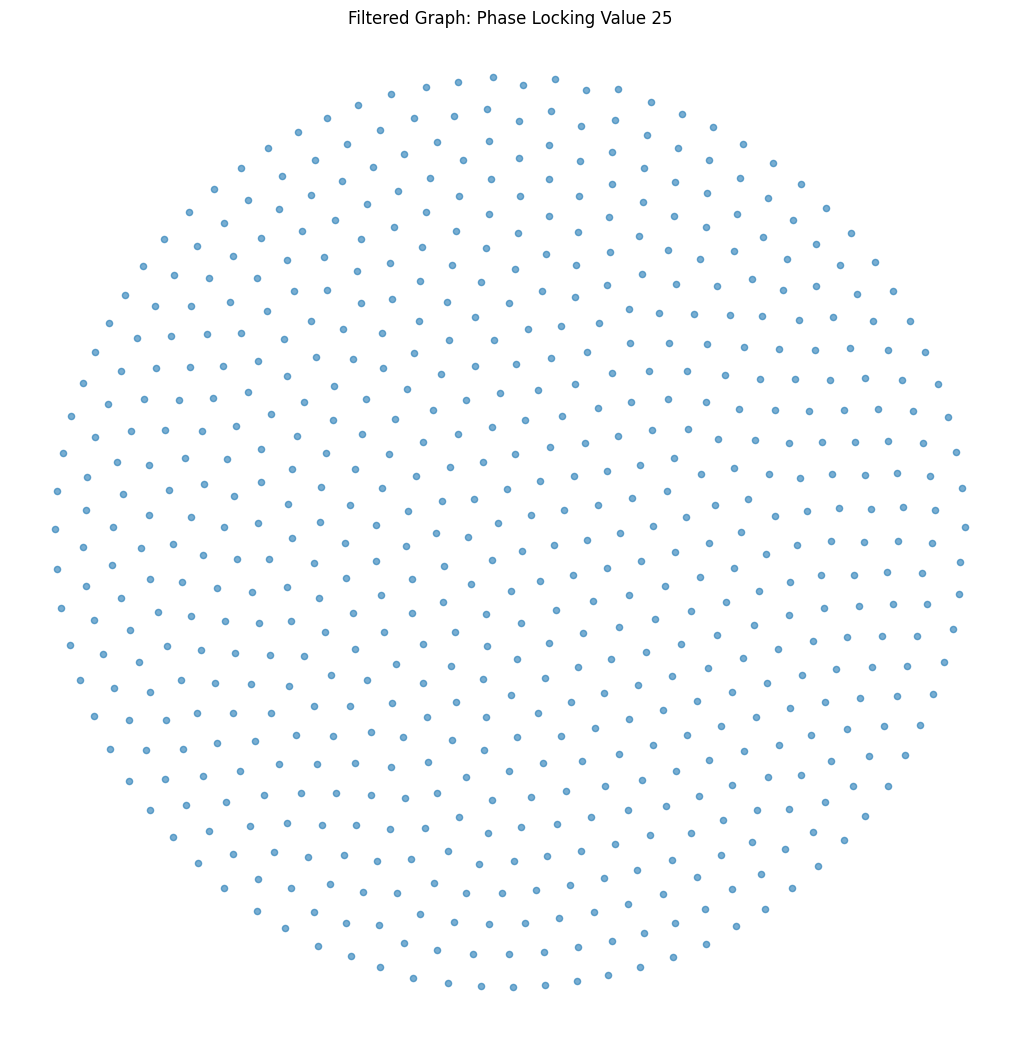

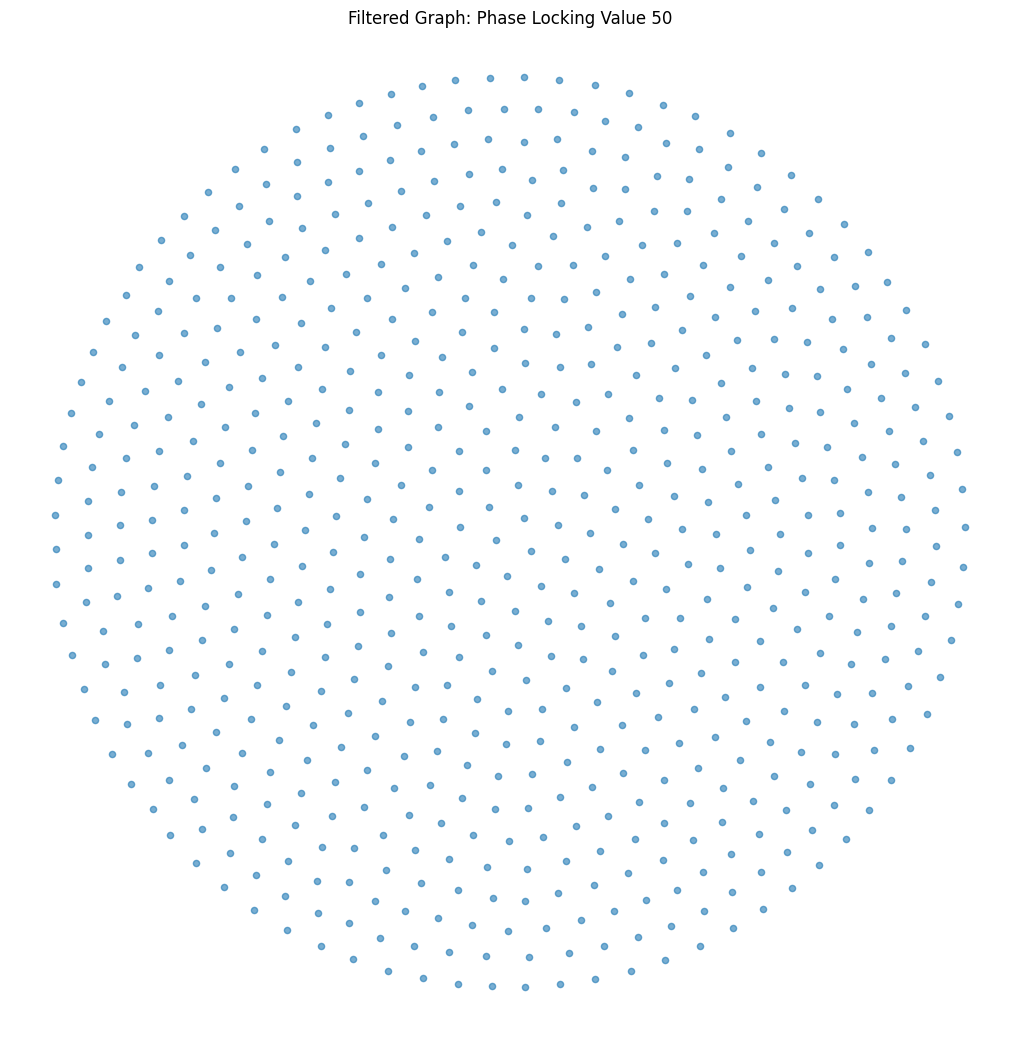

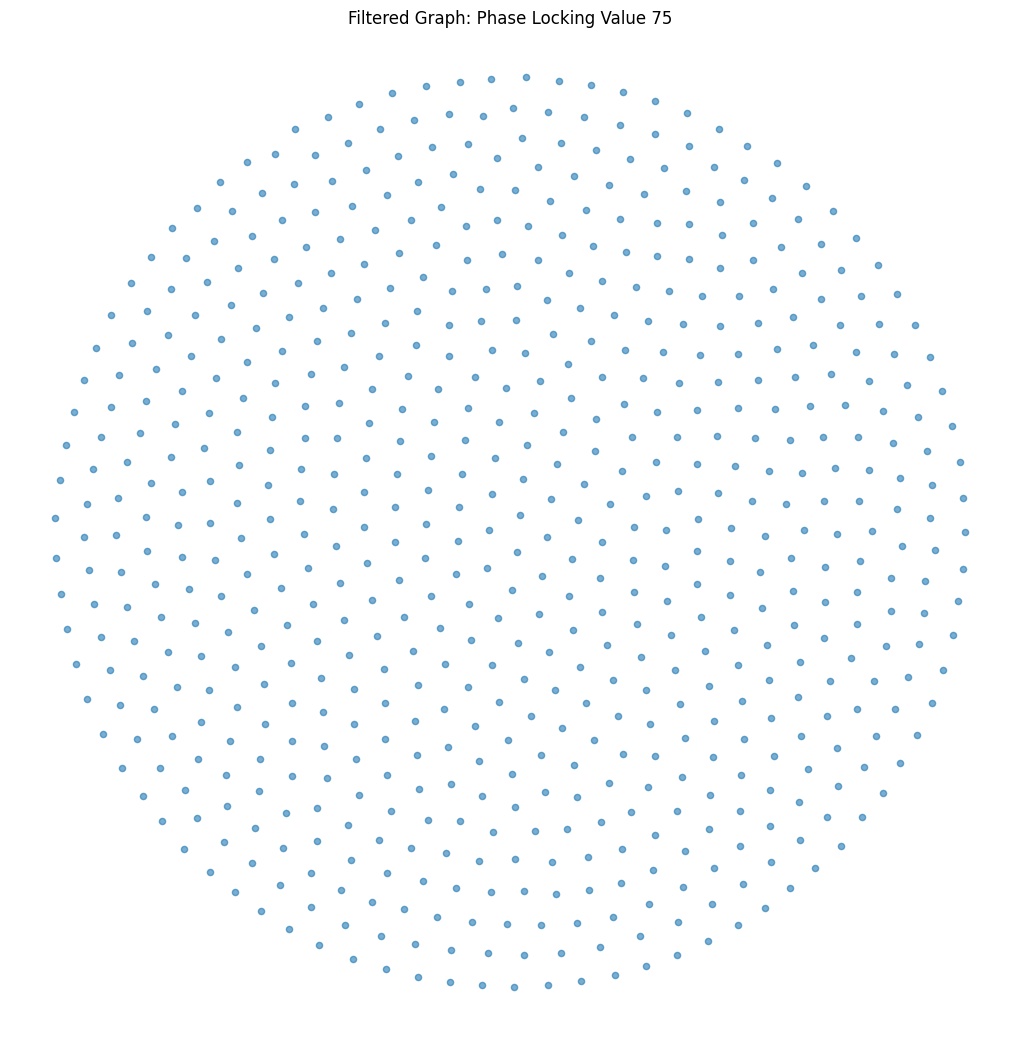

In [31]:
# PLV
plt.figure(figsize=(8, 2))
plv = sns.heatmap(plv_df.values,
                 annot=False, cmap='GnBu', fmt=".2f")
plt.show()

# Distribución
plt.figure(figsize=(8, 6))
val_plv = corr_df.values[np.triu_indices_from(plv_df, k=1)]
plt.hist(val_plv, bins=45)

#percentiles
p25_p = np.percentile(val_plv, 25)  
p50_p = np.percentile(val_plv, 50)  
p75_p = np.percentile(val_plv, 75)  

print(f"Percentil 25: {p25_p:.4f}")
print(f"Percentil 50: {p50_p:.4f}")
print(f"Percentil 75: {p75_p:.4f}")

# gráficas
percentiles_p = {'25': p25_p, '50': p50_p, '75': p75_p}
filtrado_p = {}

for name, threshold in percentiles_p.items():
    G_filt_p = nx.Graph()
    num_nodes_p = coh_df.shape[0]
    G_filt_p.add_nodes_from(range(num_nodes_p))

    for i in range(num_nodes_p):
        for j in range(i + 1, num_nodes_p):
            weight_p = plv_df.iloc[i, j]
            if abs(weight_p) > threshold: 
                G_filt_c.add_edge(i, j, weight_p=weight_p)

    graph_key_p = f"phase locking value_{name.replace(' ', '_').lower()}"
    filtrado_p[graph_key_p] = G_filt_p

    print(f"Created graph '{graph_key_p}' with {G_filt_p.number_of_nodes()} nodes and {G_filt_p.number_of_edges()} edges.")

for graph_key, G_to_draw in filtrado_p.items():
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G_to_draw) 
    nx.draw(G_to_draw, pos, with_labels=False, node_size=20, edge_color='gray', alpha=0.6)
    plt.title(f'Filtered Graph: {graph_key.replace("_", " ").title()}')
    plt.show()

## Sección 3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot


/var/folders/48/5mv2c8bn0mn_vl9c6chb0flm0000gp/T/ipykernel_5458/1220224174.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hot')


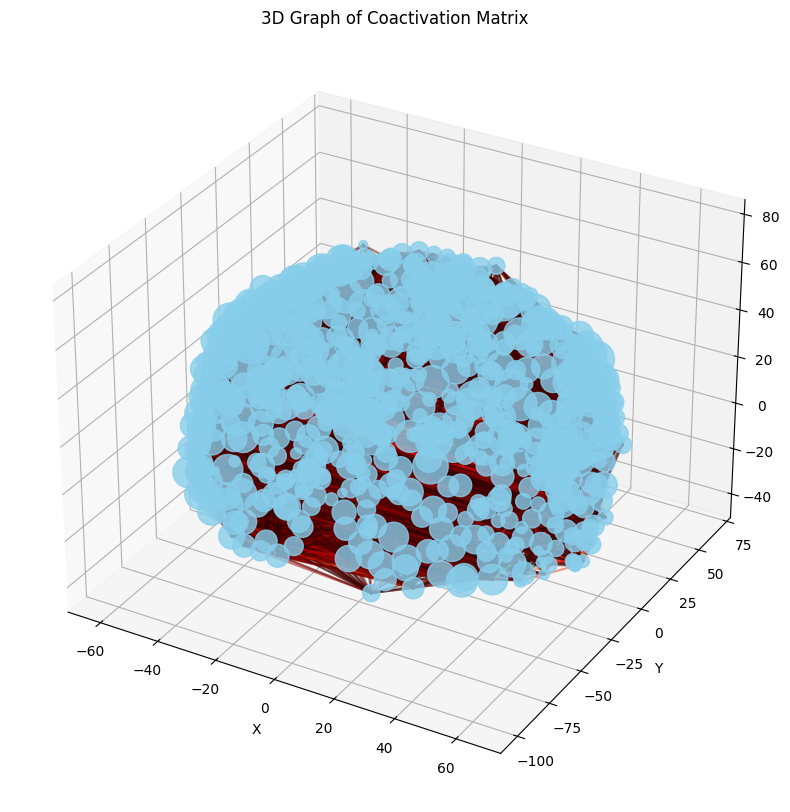

In [33]:
import matplotlib.cm as cm

coords = datos['Coord'] 

G_3d = nx.from_numpy_array(data)

degrees_3d = dict(G_3d.degree())
node_size_factor = 5 
node_sizes = [degrees_3d[node] * node_size_factor for node in G_3d.nodes()]

edge_weights = np.array([G_3d[u][v]['weight'] for u, v in G_3d.edges()])

if np.max(edge_weights) != np.min(edge_weights):
    norm_edge_weights = (edge_weights - np.min(edge_weights)) / (np.max(edge_weights) - np.min(edge_weights))
else:
    norm_edge_weights = np.zeros_like(edge_weights) 

cmap = cm.get_cmap('hot')
edge_colors = cmap(norm_edge_weights)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

node_xyz = np.array([coords[i] for i in G_3d.nodes()])

ax.scatter(node_xyz[:, 0], node_xyz[:, 1], node_xyz[:, 2], s=node_sizes, c='skyblue', alpha=0.8)

for i, (u, v) in enumerate(G_3d.edges()):
    x = np.array([coords[u, 0], coords[v, 0]])
    y = np.array([coords[u, 1], coords[v, 1]])
    z = np.array([coords[u, 2], coords[v, 2]])
    ax.plot(x, y, z, color=edge_colors[i], alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Graph of Coactivation Matrix')

plt.show()

## Sección 4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

In [35]:
import mne
raw = mne.io.read_raw_edf(r"/Users/Maca/Desktop/Todo todo/UNAM/5º Semestre/Neurociencias-2026-1/S03_datasets/EEG_practica/chb01_01.edf", preload=True)

print(raw)
print(raw.info)

Extracting EDF parameters from /Users/Maca/Desktop/Todo todo/UNAM/5º Semestre/Neurociencias-2026-1/S03_datasets/EEG_practica/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/48/5mv2c8bn0mn_vl9c6chb0flm0000gp/T/ipykernel_5458/2266867121.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(r"/Users/Maca/Desktop/Todo todo/UNAM/5º Semestre/Neurociencias-2026-1/S03_datasets/EEG_practica/chb01_01.edf", preload=True)


<RawEDF | chb01_01.edf, 23 x 921600 (3600.0 s), ~161.7 MiB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: Surrogate>
>


In [42]:
import bct

eeg_channels = [ch for ch in raw.ch_names if 'EEG' in ch];
raw_eeg = raw.copy().pick_channels(eeg_channels, ordered=True);
variances = raw_eeg.get_data().var(axis=1);
variance_threshold = 1e-10
low_variance_channels = [raw_eeg.ch_names[i] for i, var in enumerate(variances) if var < variance_threshold];
raw_eeg.drop_channels(low_variance_channels);
raw_eeg.set_eeg_reference('average', projection=True);
raw_eeg.apply_proj();
l_freq, h_freq = 1, 40
raw_eeg.filter(l_freq, h_freq, fir_design='firwin');
preprocessed_data = raw_eeg.get_data();

connectivity_matrix = np.corrcoef(preprocessed_data);
connectivity_matrix_df = pd.DataFrame(connectivity_matrix);
connectivity_matrix_df.fillna(0, inplace=True);
connectivity_matrix_df.replace([np.inf, -np.inf], 0, inplace=True);

G_edf = nx.from_numpy_array(connectivity_matrix_df.values);


# GRADOS NODOS
edf_degrees = dict(G_edf.degree())
print("Node Degrees:", edf_degrees)

# EFICIENCIA GLOBAL
edf_global_efficiency = bct.efficiency_wei(connectivity_matrix_df.values)
print("Global Efficiency:", edf_global_efficiency)

# EFICIENCIA LOCAL
edf_local_efficiency = bct.efficiency_wei(connectivity_matrix_df.values, local=True)
print("Local Efficiency:", edf_local_efficiency)

# COEFICIENTE DE CLUSTER
edf_clustering_coefficient = nx.average_clustering(G_edf)
print("Clustering Coefficient:", edf_clustering_coefficient)

# RUTA MÁS CORTA
if nx.is_connected(G_edf):
    edf_avg_shortest_path_length = nx.average_shortest_path_length(G_edf)
    print("Average Shortest Path Length:", edf_avg_shortest_path_length)
else:
    print("Graph is disconnected. Cannot calculate average shortest path length for the entire graph.")
    largest_component_edf = max(nx.connected_components(G_edf), key=len)
    G_edf_largest_component = G_edf.subgraph(largest_component_edf).copy()
    if len(G_edf_largest_component) > 1:
        edf_avg_shortest_path_length = nx.average_shortest_path_length(G_edf_largest_component)
        print("Average Shortest Path Length (Largest Component):", edf_avg_shortest_path_length)
    else:
        edf_avg_shortest_path_length = 0
        print("Largest component has only one node. Average shortest path length is undefined.")

# MUNDO PEQUEÑO
n_nodes_edf = G_edf.number_of_nodes()
n_edges_edf = G_edf.number_of_edges()
G_random_edf = nx.gnm_random_graph(n_nodes_edf, n_edges_edf)
clustering_coefficient_random_edf = nx.average_clustering(G_random_edf)
print("Clustering Coefficient (Random Graph):", clustering_coefficient_random_edf)
if nx.is_connected(G_random_edf):
    avg_shortest_path_length_random_edf = nx.average_shortest_path_length(G_random_edf)
    print("Average Shortest Path Length (Random Graph):", avg_shortest_path_length_random_edf)
else:
    print("Random graph is disconnected. Cannot calculate average shortest path length for the entire graph.")
    largest_component_random_edf = max(nx.connected_components(G_random_edf), key=len)
    G_random_largest_component_edf = G_random_edf.subgraph(largest_component_random_edf).copy()
    if len(G_random_largest_component_edf) > 1:
        avg_shortest_path_length_random_edf = nx.average_shortest_path_length(G_random_largest_component_edf)
        print("Average Shortest Path Length (Random Graph - Largest Component):", avg_shortest_path_length_random_edf)
    else:
        avg_shortest_path_length_random_edf = 0
        print("Largest component of random graph has only one node. Average shortest path length is undefined.")

if avg_shortest_path_length_random_edf > 0 and edf_avg_shortest_path_length > 0 and clustering_coefficient_random_edf > 0:
    small_world_coefficient_edf = (edf_clustering_coefficient / clustering_coefficient_random_edf) / (edf_avg_shortest_path_length / avg_shortest_path_length_random_edf)
    print("Small-world Coefficient:", small_world_coefficient_edf)
elif clustering_coefficient_random_edf == 0:
     print("Clustering coefficient of random graph is zero. Cannot calculate small-world coefficient.")
else:
    print("Average shortest path length of original or random graph is zero or undefined. Cannot calculate small-world coefficient.")

# COMUNIDADES
G_edf_abs = nx.from_numpy_array(np.abs(connectivity_matrix_df.values))
edf_partition = community_louvain.best_partition(G_edf_abs)
print("Communities:", edf_partition)

# HUBS
edf_degrees_abs = dict(G_edf_abs.degree())
edf_avg_degree_abs = np.mean(list(edf_degrees_abs.values()))
edf_hubs_abs = [node for node, degree in edf_degrees_abs.items() if degree > edf_avg_degree_abs]
print("Potential Hubs (degree > average) using absolute weights:", edf_hubs_abs)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

Node Degrees: {0: 24, 1: 24, 

## Sección 5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

/var/folders/48/5mv2c8bn0mn_vl9c6chb0flm0000gp/T/ipykernel_5458/3529430560.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hot')


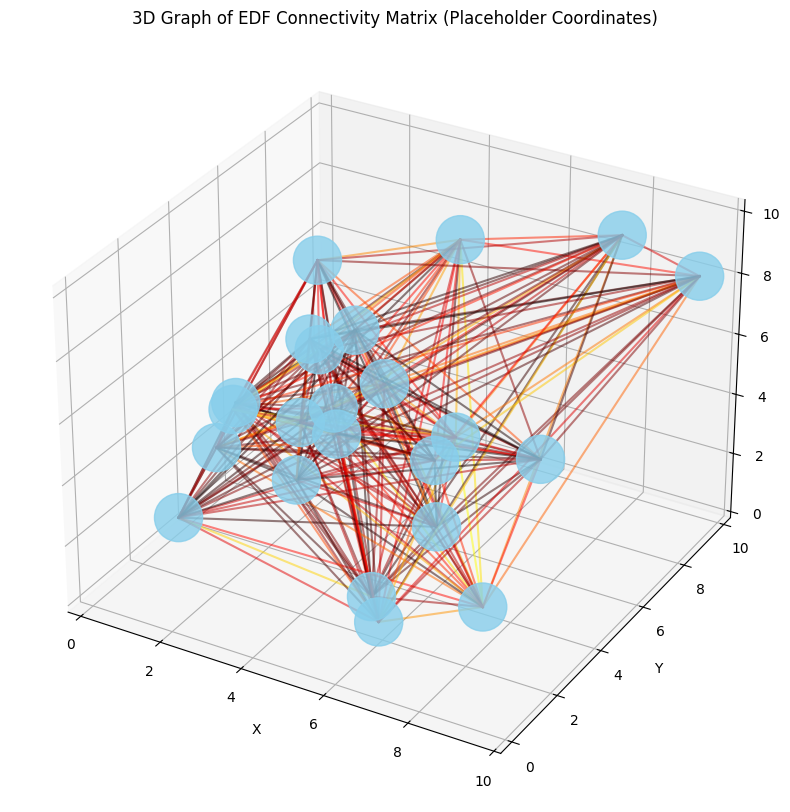

In [43]:
num_nodes = G_edf.number_of_nodes()

np.random.seed(42) 
coords_edf = np.random.rand(num_nodes, 3) * 10 

edf_degrees = dict(G_edf.degree())
node_size_factor = 50 
node_sizes_edf = [edf_degrees[node] * node_size_factor for node in G_edf.nodes()]

edge_weights_edf = np.array([G_edf[u][v]['weight'] for u, v in G_edf.edges()])
abs_edge_weights_edf = np.abs(edge_weights_edf)


if np.max(abs_edge_weights_edf) != np.min(abs_edge_weights_edf):
    norm_edge_colors_edf = (abs_edge_weights_edf - np.min(abs_edge_weights_edf)) / (np.max(abs_edge_weights_edf) - np.min(abs_edge_weights_edf))
else:
    norm_edge_colors_edf = np.zeros_like(abs_edge_weights_edf) # All weights are the same, use one color

cmap = cm.get_cmap('hot')
edge_colors_edf = cmap(norm_edge_colors_edf)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

node_xyz_edf = coords_edf

ax.scatter(node_xyz_edf[:, 0], node_xyz_edf[:, 1], node_xyz_edf[:, 2], s=node_sizes_edf, c='skyblue', alpha=0.8)

for i, (u, v) in enumerate(G_edf.edges()):
    x = np.array([coords_edf[u, 0], coords_edf[v, 0]])
    y = np.array([coords_edf[u, 1], coords_edf[v, 1]])
    z = np.array([coords_edf[u, 2], coords_edf[v, 2]])
    ax.plot(x, y, z, color=edge_colors_edf[i], alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Graph of EDF Connectivity Matrix (Placeholder Coordinates)')

plt.show()